<a href="https://colab.research.google.com/github/galihweb000haha/CNN/blob/main/titanic_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split

# Figure inline and set visualization style
%matplotlib inline
sns.set()

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
print(df_train.shape)
df_train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(df_test.shape)
df_test.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Basic EDA

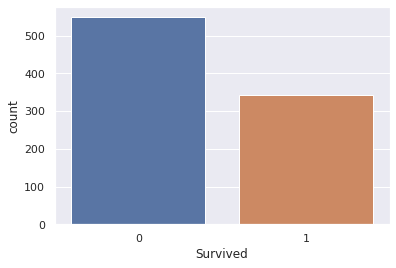

In [5]:
sns.countplot(x='Survived', data=df_train);

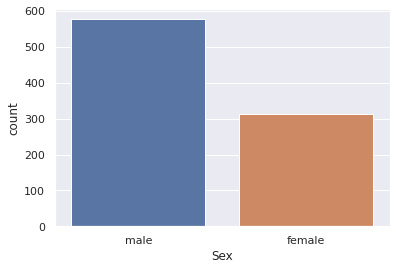

In [6]:
sns.countplot(x='Sex', data=df_train)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


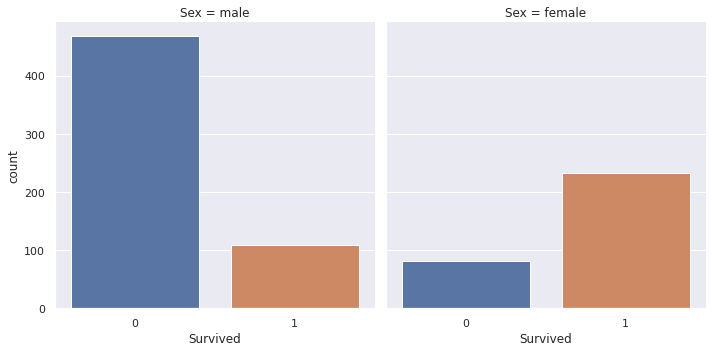

In [7]:
sns.factorplot(x='Survived', col='Sex', kind='count', data=df_train);

In [8]:
df_train.groupby(['Sex']).Survived.sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [9]:
print(df_train[df_train.Sex == 'female'].Survived.sum()/df_train[df_train.Sex == 'female'].Survived.count())
print(df_train[df_train.Sex == 'male'].Survived.sum()/df_train[df_train.Sex == 'male'].Survived.count())

0.7420382165605095
0.18890814558058924


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


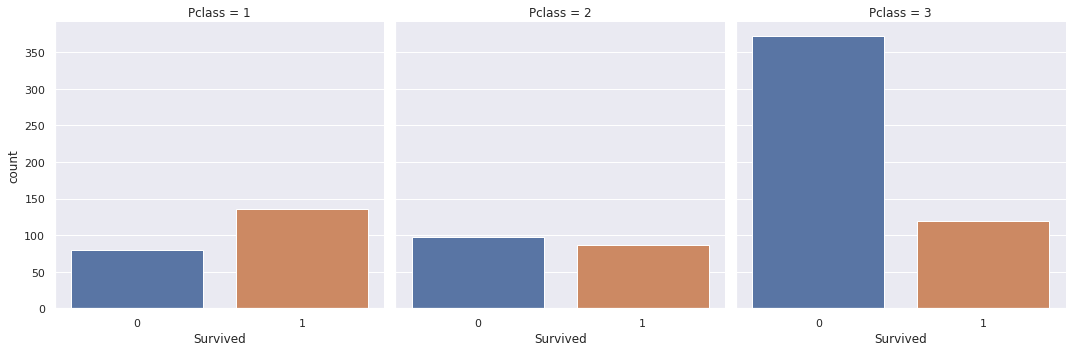

In [10]:
sns.factorplot(x='Survived', col='Pclass', kind='count', data=df_train);

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


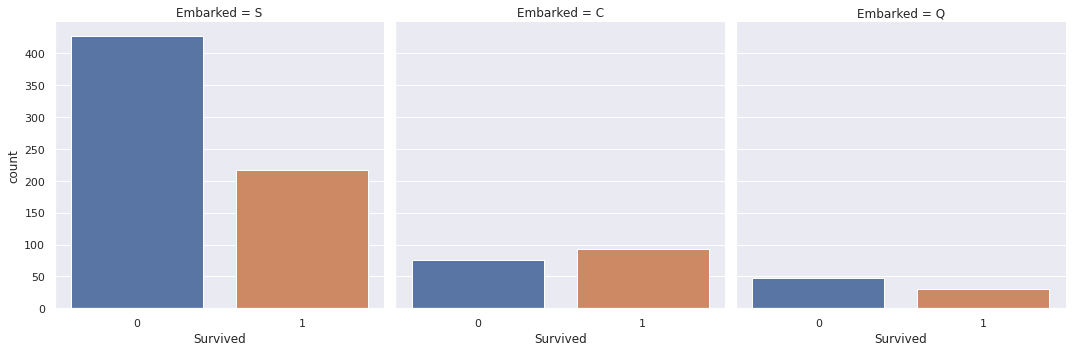

In [11]:
sns.factorplot(x='Survived', col='Embarked', kind='count', data=df_train);

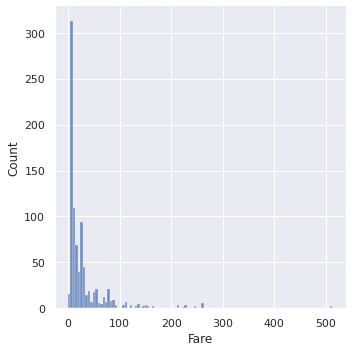

In [12]:
sns.displot(df_train.Fare, kde=False)

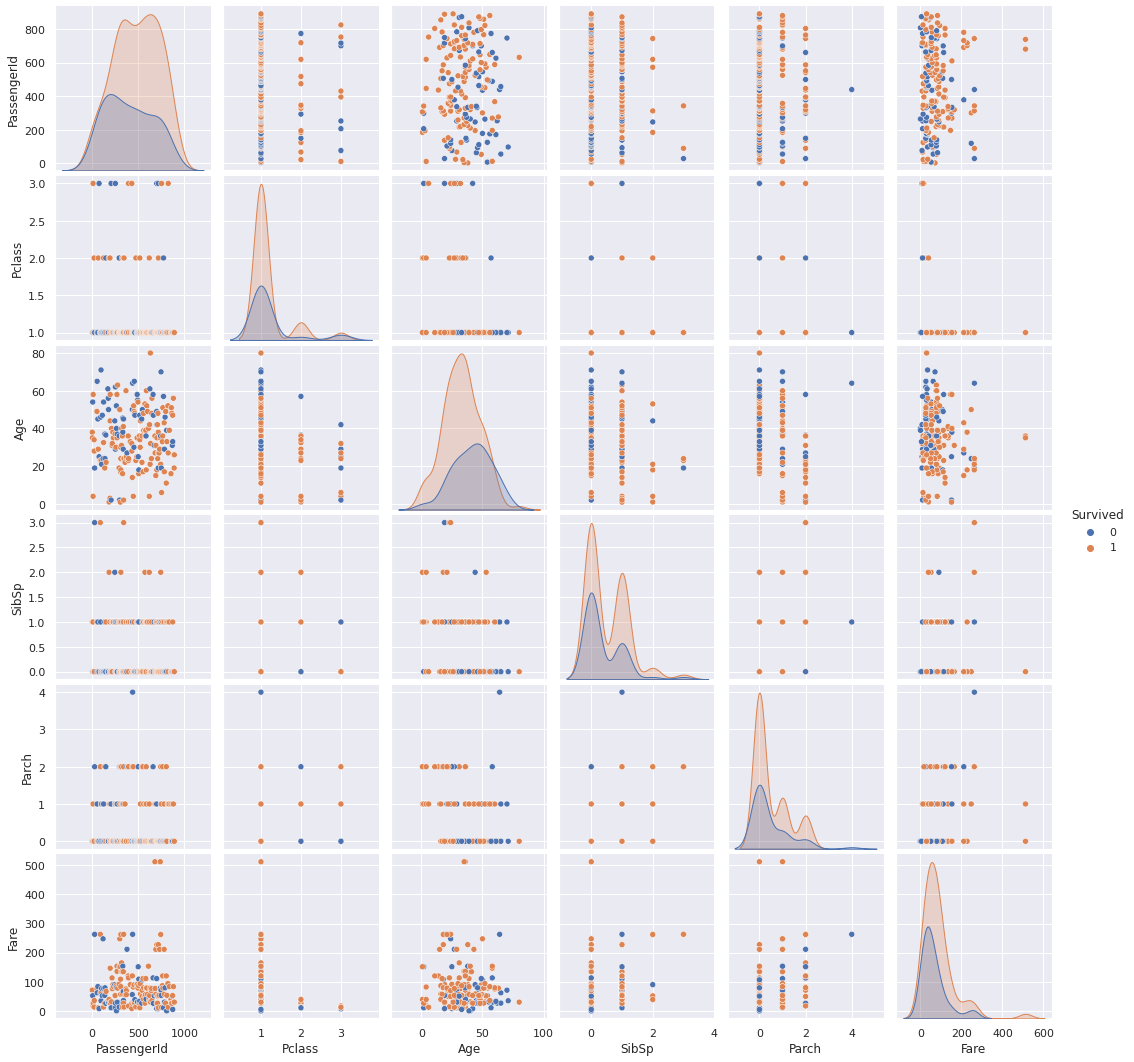

In [13]:
df_train_drop = df_train.dropna()
sns.pairplot(df_train_drop, hue='Survived')

# Data Wrangling

In [14]:
survived_train = df_train.Survived
data = pd.concat([df_train.drop(['Survived'], axis=1), df_test])

In [15]:
data['Age'] = data.Age.fillna(data.Age.median())
data['Fare'] = data.Fare.fillna(data.Fare.median())

In [16]:
data = pd.get_dummies(data, columns=['Sex'], drop_first=True)
data.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1


In [17]:
data = data[['Sex_male', 'Fare', 'Age', 'Pclass', 'SibSp']]
data.head()

,Sex_male,Fare,Age,Pclass,SibSp
0,1,7.2500,22.0,3,1
1,0,71.2833,38.0,1,1
2,0,7.9250,26.0,3,0
3,0,53.1000,35.0,1,1
4,1,8.0500,35.0,3,0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex_male  1309 non-null   uint8  
 1   Fare      1309 non-null   float64
 2   Age       1309 non-null   float64
 3   Pclass    1309 non-null   int64  
 4   SibSp     1309 non-null   int64  
dtypes: float64(2), int64(2), uint8(1)
memory usage: 52.4 KB


In [19]:
data_train = data.iloc[:891]
data_test = data.iloc[891:]

In [20]:
X = data_train.values
test = data_test.values
y = survived_train.values

In [21]:
clf = tree.DecisionTreeClassifier()
clf.fit(X, y) 

DecisionTreeClassifier()

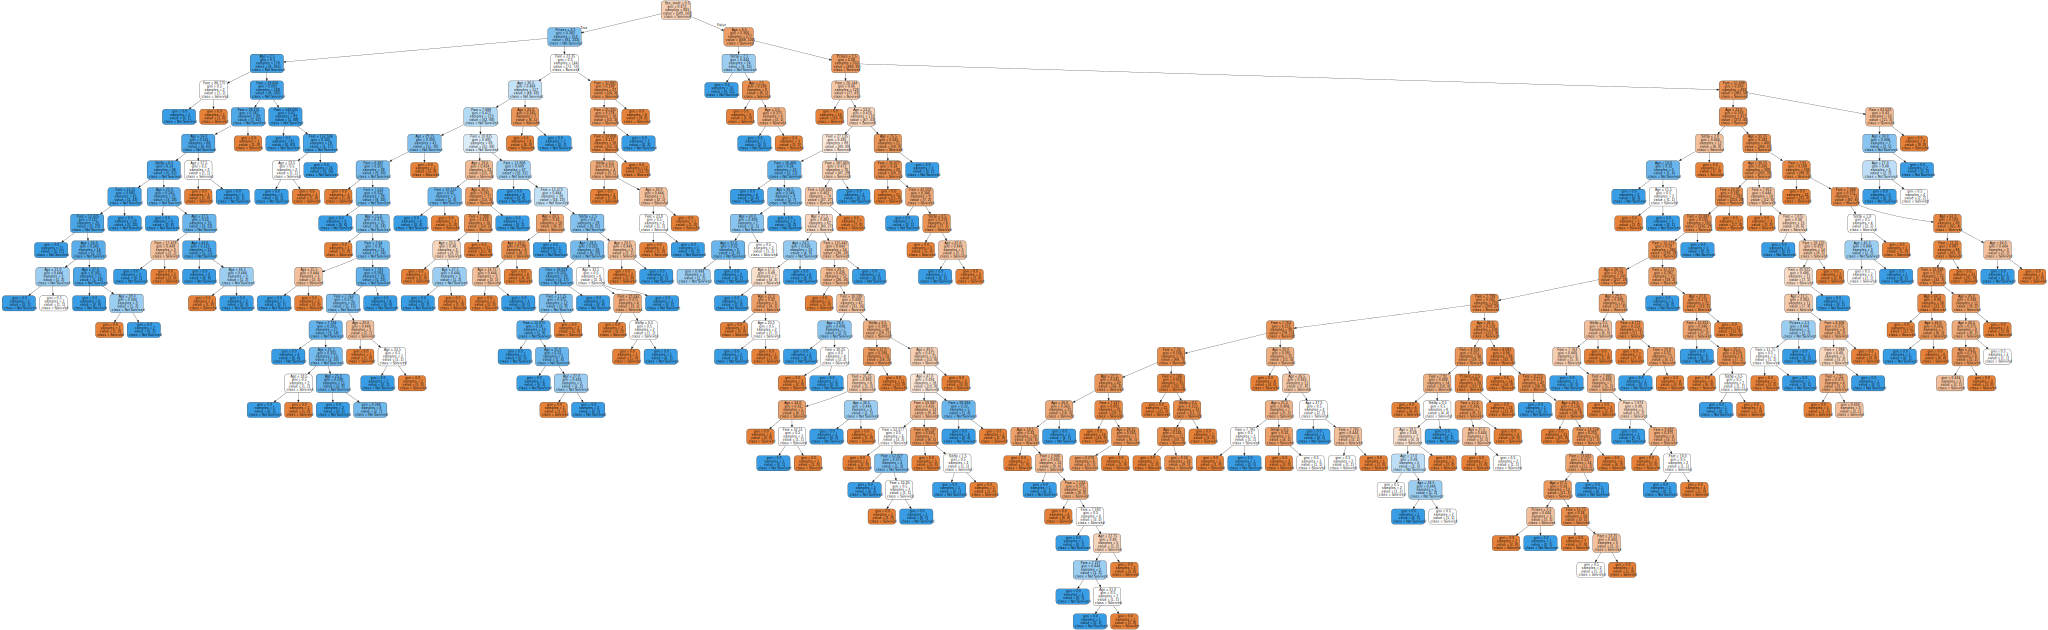

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=data_train.columns.values,  
                         class_names=['Survived','Not Survived'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [22]:
Y_pred = clf.predict(test)
df_test['Survived'] = Y_pred
clf.score(X, y)

0.978675645342312

In [24]:
df_test[['PassengerId', 'Survived']].to_csv('dec_tree.csv', index=False)

# Second Try

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [26]:
dep = np.arange(1,9)
train_accuracy = np.empty(len(dep))
test_accuracy = np.empty(len(dep))

In [27]:
# Loop over different values of k
for i, k in enumerate(dep):
    # Setup a Decision Tree Classifier
    clf = tree.DecisionTreeClassifier(max_depth=k)

    # Fit the classifier to the training data
    clf.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = clf.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = clf.score(X_test, y_test)

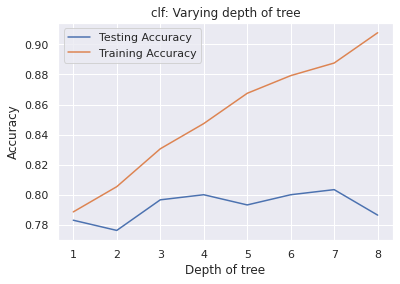

In [28]:
# Generate plot
plt.title('clf: Varying depth of tree')
plt.plot(dep, test_accuracy, label = 'Testing Accuracy')
plt.plot(dep, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy')
plt.show()

In [29]:
clf = tree.DecisionTreeClassifier(max_depth=6)
clf.fit(X, y)
clf.score(X, y)

0.8686868686868687

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=data_train.columns.values,  
                         class_names=['Survived','Not Survived'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [31]:
# Make predictions and store in 'Survived' column of df_test
Y_pred = clf.predict(test)
df_test['Survived'] = Y_pred
df_test[['PassengerId', 'Survived']].to_csv('6dep_dec_tree.csv', index=False)

# Feature Engineering

In [32]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df = df_train.append(df_test, sort=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [33]:
df['Surname'] = df['Name'].str.split(',').str[0]
df['Surname'].head()

0       Braund
1      Cumings
2    Heikkinen
3     Futrelle
4        Allen
Name: Surname, dtype: object

In [34]:
df['Title'] = df['Name'].str.split(',').str[1].str.split().str[0]
df['Title'].head()

0      Mr.
1     Mrs.
2    Miss.
3     Mrs.
4      Mr.
Name: Title, dtype: object

In [35]:
df['Cabin Letter'] = df['Cabin'].str[0]
df['Cabin Letter'][27:32]

27      C
28    NaN
29    NaN
30    NaN
31      B
Name: Cabin Letter, dtype: object

In [36]:
df['Family_Size'] = df['SibSp'] + df['Parch']
df['Family_Size'].head()

0    1
1    1
2    0
3    1
4    0
Name: Family_Size, dtype: int64

In [37]:
df[df['Name'].str.contains('Andersson,')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Title,Cabin Letter,Family_Size
13,14,0.0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,Andersson,Mr.,NaN,6
68,69,1.0,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S,Andersson,Miss.,NaN,6
119,120,0.0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S,Andersson,Miss.,NaN,6
146,147,1.0,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S,Andersson,Mr.,NaN,0
541,542,0.0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.2750,NaN,S,Andersson,Miss.,NaN,6
542,543,0.0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.2750,NaN,S,Andersson,Miss.,NaN,6
610,611,0.0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S,Andersson,Mrs.,NaN,6
813,814,0.0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S,Andersson,Miss.,NaN,6
850,851,0.0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S,Andersson,Master.,NaN,6
214,1106,NaN,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.7750,NaN,S,Andersson,Miss.,NaN,6


In [38]:
df['Fare Per Person'] = df['Fare'] / (df['Family_Size'] + 1)
df['Fare Per Person'].head()


0     3.62500
1    35.64165
2     7.92500
3    26.55000
4     8.05000
Name: Fare Per Person, dtype: float64

In [39]:
df['Number of Ticket Uses'] = df.groupby('Ticket', as_index=False)['Ticket'].transform(lambda s: s.count())
df['Number of Ticket Uses'].head()

0    1
1    2
2    1
3    2
4    1
Name: Number of Ticket Uses, dtype: int64

In [40]:
df['Average Fare per Person'] = df['Fare'] / df['Number of Ticket Uses'] 
df['Average Fare per Person'].head()

0     7.25000
1    35.64165
2     7.92500
3    26.55000
4     8.05000
Name: Average Fare per Person, dtype: float64

# Data Wrangling

In [41]:
for col in df.columns:  
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')  # change text to category
        df[col] = df[col].cat.codes  # save code as column value

In [42]:
df['Age'] = df.Age.fillna(df.Age.median())
df['Fare'] = df.Fare.fillna(df.Fare.median())
df['Fare Per Person'] = df['Fare Per Person'].fillna(df['Fare Per Person'].median())
df['Average Fare per Person'] = df['Average Fare per Person'].fillna(df['Average Fare per Person'].median())

In [43]:
data_train = df.iloc[:891].copy()
data_test = df.iloc[891:].copy()

In [44]:
train, test = train_test_split(data_train, test_size=0.2, random_state=42)

In [45]:
# Instantiate model and fit to data
clf = tree.DecisionTreeClassifier()

In [46]:
remove = ['Survived', 'PassengerId', 'Name', 'Cabin', 'Embarked']
feats = [col for col in df.columns if col not in remove]

In [47]:
clf.fit(train[feats], train['Survived'])


DecisionTreeClassifier()

In [48]:
preds_train = clf.predict(train[feats])

In [49]:
preds = clf.predict(test[feats])

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
accuracy_score(train['Survived'], preds_train)

0.9985955056179775

In [52]:
accuracy_score(test['Survived'], preds)

0.8100558659217877

In [53]:
# train with training and test dataset
clf.fit(data_train[feats],data_train['Survived'])

DecisionTreeClassifier()

In [54]:
preds_kaggle = clf.predict(data_test[feats])

In [55]:
submission = pd.DataFrame({ 'PassengerId': data_test['PassengerId'],
                            'Survived': preds_kaggle }, dtype=int)
submission.to_csv("submission_FEAT.csv",index=False)